# Exploratory Data Analysis on Spotify 2023 Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#I imported the CSV file containing the data frame and used "ISO-8859-1" as the encoding scheme where text is translated from bytes to text.

raw = pd.read_csv('SpotifyData.csv', encoding = 'ISO-8859-1')
raw


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##### Additional Information

The `encoding` parameter in `pd.read_csv()` specifies the character encoding used to interpret the file’s text. In simple terms, encoding is a way to represent characters as bytes, allowing the computer to correctly interpret text. Without the correct encoding, you might see errors or incorrect characters when reading a file.

###### Why Encoding Matters
Computers store text as bytes, but different encodings interpret these bytes differently. For example, the byte sequence for "ñ" in `utf-8` is different from its representation in `ISO-8859-1`. If you try to read a file in the wrong encoding, the byte sequences can’t be correctly interpreted, resulting in errors like the `UnicodeDecodeError` you saw.

###### Common Encodings
1. **UTF-8**: A widely-used encoding standard for web data and modern systems. It supports a vast range of characters from various languages, which makes it ideal for text data with diverse characters.
2. **ISO-8859-1 (Latin-1)**: Common in Western Europe for older documents, this encoding supports 256 characters but lacks coverage for characters outside the Latin alphabet.
3. **UTF-16/UTF-32**: These encodings use more bytes for each character, supporting a larger range of characters. However, they’re less common for CSV files due to file size concerns.

###### Common Encodings Why You Might Need to Specify It
When reading files, Pandas defaults to UTF-8. If the file uses a different encoding, like `ISO-8859-1`, an error occurs because Pandas can't match the bytes to valid characters in UTF-8. Specifying the correct encoding ensures that Pandas interprets the file accurately, avoiding errors and preserving the text's integrity.



 Source: ChatGPT


# A. Data Wrangling - Month Name
- I will manipulate some information to make te data more readable (e.g. month name)
- Some data cleaning and organization are done while answering the following guide questions below

In [9]:
# I check first what months the tracks are released in the given data frame.

# This code stores every entry from the released_month column without any single repetition, thus making every entry unique.
month_name = raw['released_month'].unique()

# This sorts the data, arranging it in ascending order.
month_name.sort()

# Check if the stored data is correct
month_name

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [11]:
# I imported a dictionary regarding the month number and their corresponding month names.

month_dictionary= {	
        1:'Janauary',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
    	10:'October',
		11:'November',
		12:'December'		
}

In [13]:
# I created a loop that replaces the month number in the 'released_month' column to their corresponding month names. 

for x in month_dictionary:
    raw['released_month'] = raw['released_month'].replace(x , month_dictionary[x])
 
raw

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,July,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,March,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,June,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,August,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,May,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,November,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,October,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,November,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,October,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# 1. Overview of Dataset

## A.	How many rows and columns does the dataset contain?

In [17]:
# Here, I extracted the information about the data frame.

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    object
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

•	How many rows and columns does the dataset contain? 
- Based from the range index there are 953 entries(rows) which are from row 0 to row 952. On the other hand, the Data Columns indicate that there are a total of 24 columns in the data frame.

## B. What are the data types of each column? Are there any missing values?

### Data Types
What are the data types of each column?
- As for the recorded data types listed above, before some changes were made on the following parts below, there are only a few which are namely "int64" and "object" data types that contain strings and integers, respectively. Note that this is subject to further changes as there will be some minor adjustments that will be made as the analysis gets further.

### Missing Values

In [23]:
# ".isna()" is used to find whether a specific entry has a value or not.
## As suggested by the keyword "isna()", it checks whether a value is Not Available, "na".
### True (1 - bit) = a value is not available ; False(0 - bit) = a value is available

raw.isna().sum()

# If True = 1 and False = 0
## Using ".sum()" indicates how many entries in each column do not have any value (blank) following the binary digit counting.


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Are there any missing values?
- Based on the list above, there are 50 missing values in the "in_shazam_charts" column and 95 missing values in the "key" column. 

# 2. Basic Descriptive Statistics

## Data Wrangling: Conversion of String (Object) to Numeric (int or float) Data Type
- Based from the overview of the data, it suggests that we need to convert an object data type into a numeric data type.
- In dealing with basic descriptive staistics, we need to work on numbers. Thus, the conversion of data types into an integer is a must.

In [28]:
# converts string (object) -> float data type (numeric)

# The " error = 'coerce' " neglects errors that are not numbers (e.g., NaN) in the column.
raw['streams'] = pd.to_numeric( raw['streams'], errors = 'coerce' )

# This is used to check the data type of the  streams column
raw.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month           object
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

### Additional Information Regarding [ errors = 'coerce' ]
When working with data in Python, it's common to encounter columns with mixed data types, especially if the column should be numeric but includes some non-numeric values. In such cases, converting these values can raise errors. To handle this, pd.to_numeric() offers the errors='coerce' option, which allows for a cleaner conversion process by handling non-numeric values gracefully.

The errors='coerce' parameter tells pd.to_numeric() to replace any values that can't be converted to numeric types (such as strings or special characters) with NaN (Not a Number) instead of raising an error. This approach is particularly useful for ensuring the data is consistent and easier to work with.

This approach is ideal when:

You need to ensure all values in a column are numeric.
You expect some entries to be non-numeric and don't want these to cause errors.
You're preparing data for analysis and need to handle inconsistent entries.
Using errors='coerce' is a simple and effective way to clean data without interrupting the data processing workflow.

Source: ChatGPT

## A. What are the mean, median, and standard deviation of the streams column?

### A.1: Mean

In [33]:
# Obtaining the mean using the .mean() function and rounding values into the nearest two decimal places

mean_streams = raw['streams'].mean()
mean_streams = round(mean_streams, 2)
mean_streams

514137424.94

#### Mean Interpretation

The mean, 514,137,424.94, is the average value of the stream data set, which measures the central tendency of a data set. This number can represent the whole data set if and only if the data set is normally distributed.

### A.2: Median

In [37]:
# Obtaining the median using the .median() function

median_streams = raw['streams'].median()
median_streams

290530915.0

#### Median Interpretation
The median value, 290,530,915.0, represents the middle value, which divides the data set into two halves. This is a better measure of central tendency when encountering skewed data and is less sensitive to outliers compared to the mean as a way to measure the data's central tendency.

### A.3: Standard Deviation

In [41]:
# Obtaining the standard deviation of the column using the .std() function and rounding its value to the nearest 2 decimal places.

stdev_streams = raw['streams'].std()
stdev_streams = round(stdev_streams, 2)
stdev_streams

566856949.04

#### Standard Deviation Interpretation
Since the standard deviation is too large, it can be concluded that the entries or data points are clustered far, spread, and distant from the mean. 

## B. What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [45]:
# Extract the unique set of years when each track was released.
release_years = raw['released_year'].unique()

# Sort the years in ascending order to understand the range of track release intervals.
release_years.sort()

# Display the sorted release years and the total number of unique release years.
print("a. Year of Releases:", release_years)
print("b. Total Number of Release Years:", len(release_years))


a. Year of Releases: [1930 1942 1946 1950 1952 1957 1958 1959 1963 1968 1970 1971 1973 1975
 1979 1982 1983 1984 1985 1986 1987 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2002 2003 2004 2005 2007 2008 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]
b. Total Number of Release Years: 50


### B.1: Analyze Distribution and Trend for Year of Release
- It is best to analyze the count/frequency/distribution of the release year using a histogram.


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

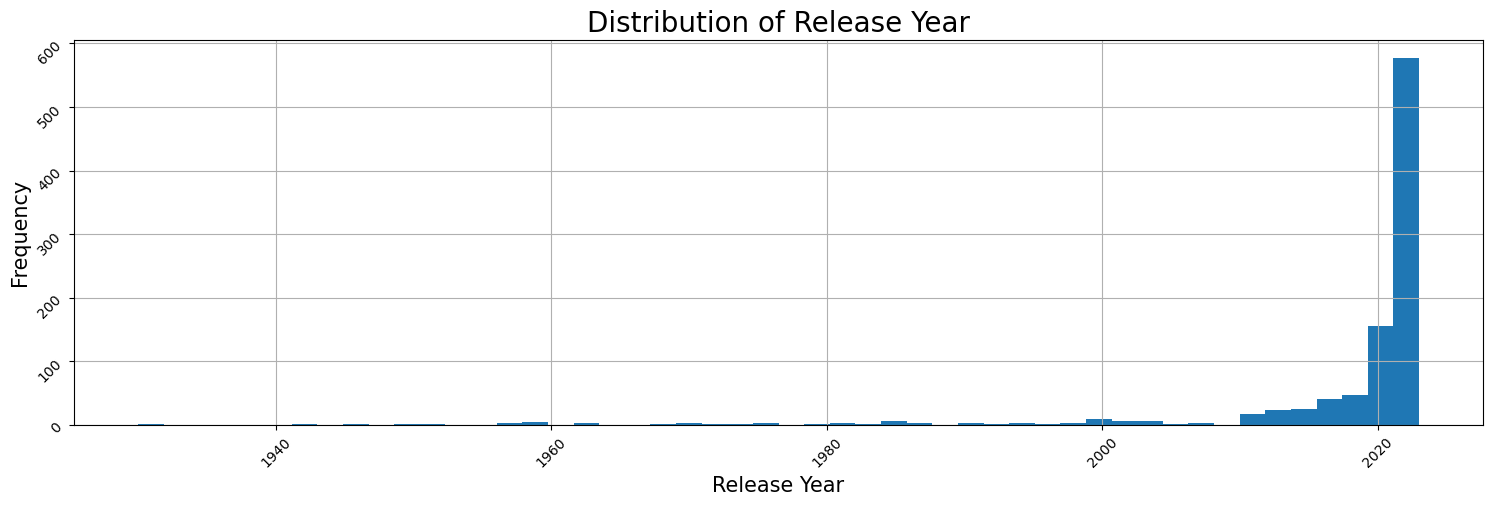

In [48]:
# Set the figure size to 40 units in width and 5 units in height
plt.figure(figsize=(40, 5))

# Create a subplot grid with 1 row and 2 columns, selecting the first subplot
plt.subplot(1, 2, 1)

# Plot a histogram of the 'released_year' column with 50 bins to show the distribution of release years
raw['released_year'].hist(bins=50)

# Add title and axis labels with adjusted font sizes for readability
plt.title('Distribution of Release Year', fontsize=20)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Rotate the x and y tick labels for readability and adjust their font size
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=45, fontsize=10)


#### Distribution and Trend for Year of Release Interpretation
- The latter years have the most track releases, which means that numerous tracks are released starting from the year 2020 and onwards.

### B.2: Outliers of the Released Years

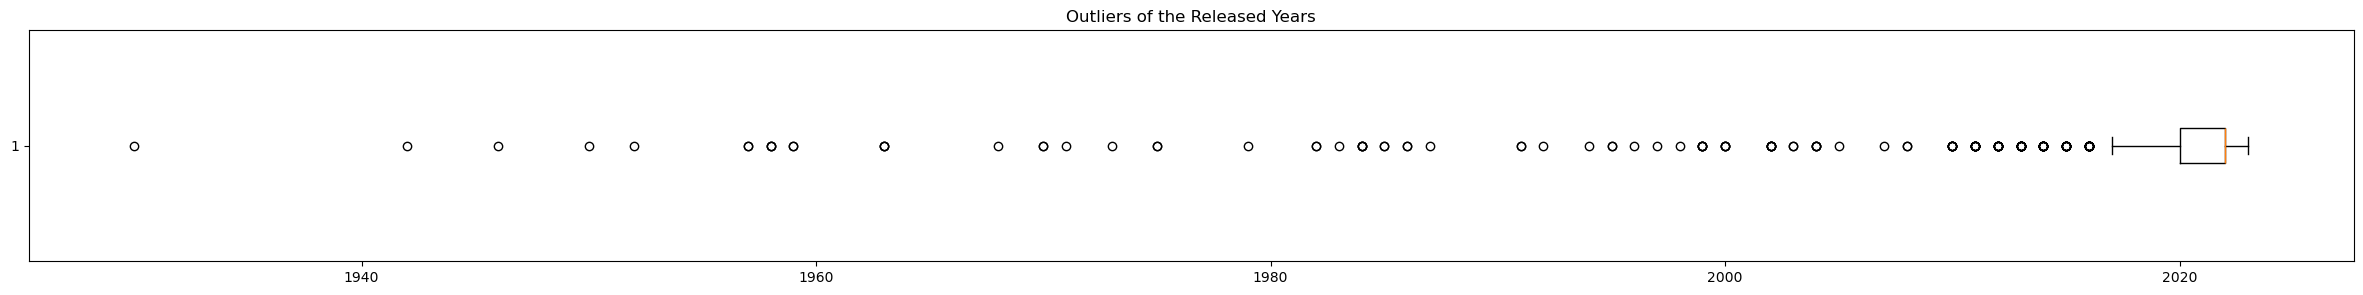

Lower Boundary: 2017.0
Upper Boundary: 2025.0
Outlier years: {1930, 1942, 1946, 1950, 1952, 1957, 1958, 1959, 1963, 1968, 1970, 1971, 1973, 1975, 1979, 1982, 1983, 1984, 1985, 1986, 1987, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016}


In [52]:
# Plot a horizontal boxplot for 'released_year' to visually identify any outliers
plt.figure(figsize=(30, 3))  # Set figure size to 30 units in width and 3 units in height

# Create a horizontal boxplot by setting vert=False
plt.boxplot(raw['released_year'], vert=False)
plt.title('Outliers of the Released Years')  # Add title for clarity
plt.show()  # Display the boxplot

## This section calculates and highlights the boundaries for outliers, based on the interquartile range (IQR)

# Calculate the first quartile (Q1 or 25th percentile) and third quartile (Q3 or 75th percentile)
Q1_ry = raw['released_year'].quantile(0.25)
Q3_ry = raw['released_year'].quantile(0.75)

# Compute the interquartile range (IQR) for 'released_year'
IQR_ry = Q3_ry - Q1_ry

# Determine the boundaries for identifying outliers using 1.5 * IQR rule
lower_bound_ry = Q1_ry - 1.5 * IQR_ry
upper_bound_ry = Q3_ry + 1.5 * IQR_ry

# Identify outliers in 'released_year' that are beyond the calculated lower and upper bounds
outliers_ry = raw[(raw['released_year'] < lower_bound_ry) | (raw['released_year'] > upper_bound_ry)]

# Convert the outlier years into a sorted list and then to a set to remove duplicates
outliers_ry = list(outliers_ry['released_year'].values)
outliers_ry.sort()
outliers_ry = set(outliers_ry)

# Print the calculated boundaries and the identified outlier years
print("Lower Boundary:", lower_bound_ry)
print("Upper Boundary:", upper_bound_ry)
print("Outlier years:", outliers_ry)


#### Outliers of the Released Years Interpretation
- Listed above are the outliers of the released years of every track in the data frame. These outliers are considered errors or have a very minimal to no impact on the data given. Frequently, these can be disregarded during the analysis stage of the data as they have minimal to no impact on the overall effect of the data. 

### B.3: Analyze Distribution and Trend for Artist Count
- It is best to analyze the count/frequency/distribution of the release year using a histogram.

Text(0, 0.5, 'Frequency')

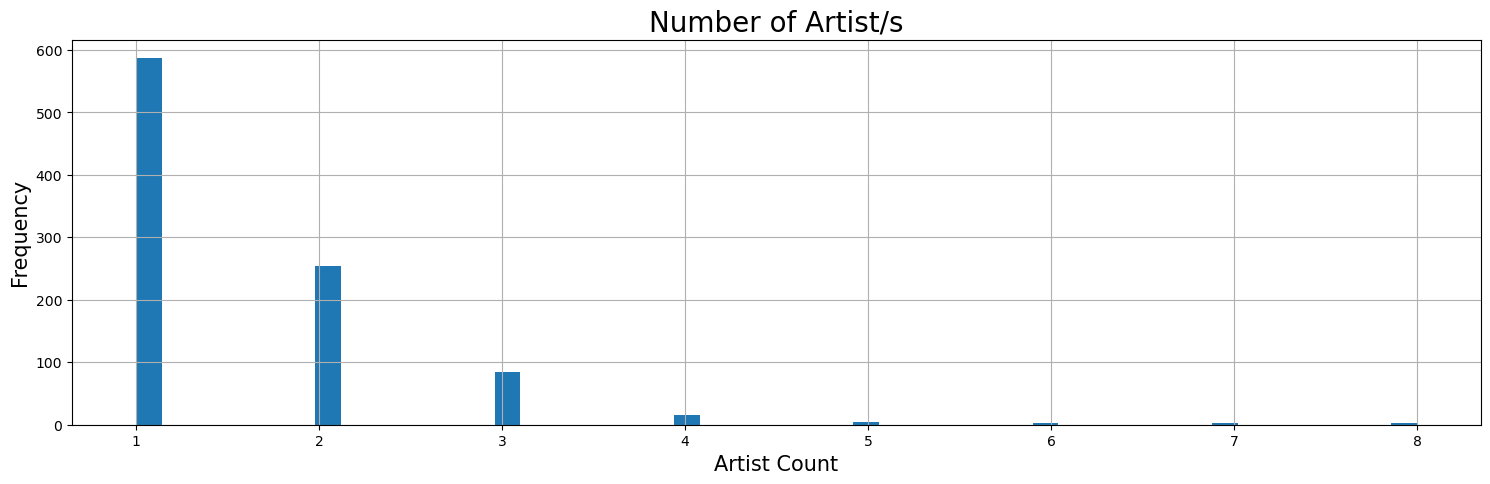

In [56]:
# Set the figure size to a wide format for better visualization (40 units wide by 5 units high)
plt.figure(figsize=(40, 5))

# Create a subplot grid with 1 row and 2 columns; select the first subplot
plt.subplot(1, 2, 1)

# Plot a histogram of the 'artist_count' column with 50 bins to display the frequency of different artist counts
raw['artist_count'].hist(bins=50)

# Add title and axis labels with adjusted font sizes for readability
plt.title('Number of Artist/s', fontsize=20)
plt.xlabel('Artist Count', fontsize=15)
plt.ylabel('Frequency', fontsize=15)


#### Distribution and Trend for Artist Count Interpretation
- From the data frame that ranges from year 1930 to 2023, the majority of the releases only had 1 artist who sang or created their respective tracks.

### B.4: Outliers of the Artist Count

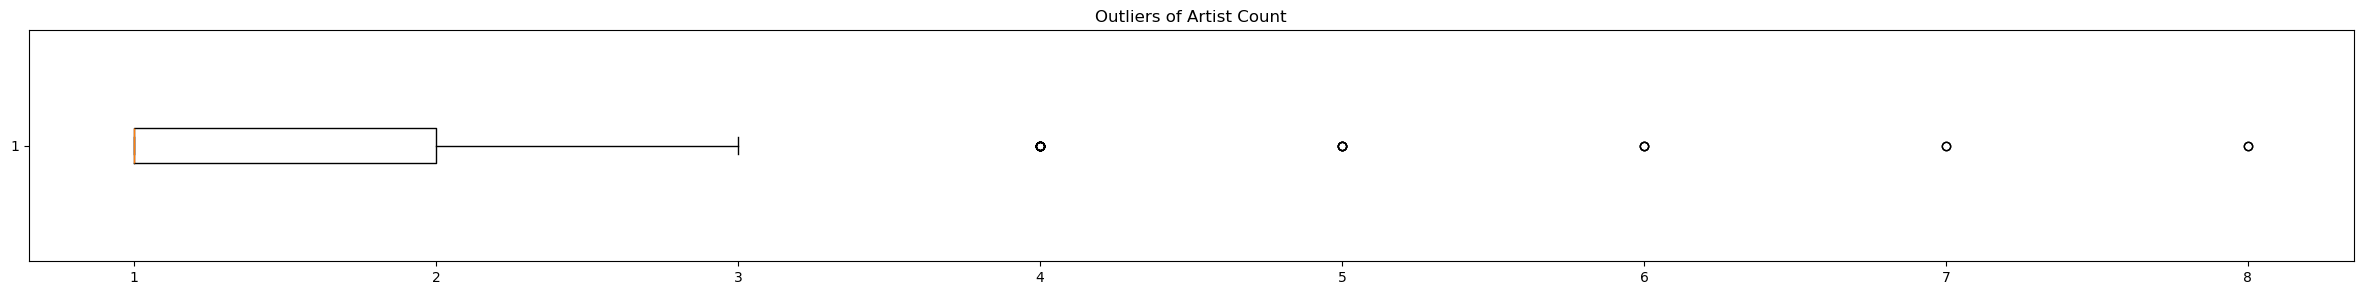

Lower Boundary: -0.5
Upper Boundary: 3.5
Outliers of Artist Count: {4, 5, 6, 7, 8}


In [60]:
# Set the figure size to a wide format for clear visualization of the boxplot and potential outliers
plt.figure(figsize=(30, 3))

# Create a horizontal boxplot for 'artist_count' to identify outliers in artist collaboration frequency
plt.boxplot(raw['artist_count'], vert=False)  # Set vert=False to make the boxplot horizontal
plt.title('Outliers of Artist Count')  # Title for context
plt.show()

# Calculate the 1st quartile (Q1 or 25th percentile) and 3rd quartile (Q3 or 75th percentile) for 'artist_count'
Q1_ac = raw['artist_count'].quantile(0.25)
Q3_ac = raw['artist_count'].quantile(0.75)

# Determine the Interquartile Range (IQR) to capture the central 50% of the data points
IQR_ac = Q3_ac - Q1_ac

# Calculate the lower and upper bounds for detecting outliers using the 1.5 * IQR rule
lower_bound_ac = Q1_ac - 1.5 * IQR_ac
upper_bound_ac = Q3_ac + 1.5 * IQR_ac

# Identify outliers in 'artist_count' that are below the lower bound or above the upper bound
outliers_ac = raw[(raw['artist_count'] < lower_bound_ac) | (raw['artist_count'] > upper_bound_ac)]

# Convert the outlier counts into a sorted list, then into a set to remove duplicates
outliers_ac = list(outliers_ac['artist_count'].values)
outliers_ac.sort()
outliers_ac = set(outliers_ac)

# Output the boundaries and the detected outliers for review
print('Lower Boundary:', lower_bound_ac)
print('Upper Boundary:', upper_bound_ac)
print('Outliers of Artist Count:', outliers_ac)


#### Outliers of the Artist Count Interpretation
- The outliers in the artist counts for each track in the data frame are listed above. These outliers are often regarded as errors or have little to no influence on the dataset. Typically, they can be overlooked during the analysis phase, as they do not significantly affect the overall results.

# 3. Top Performers

## A. Which track has the highest number of streams? Display the top 5 most streamed tracks.

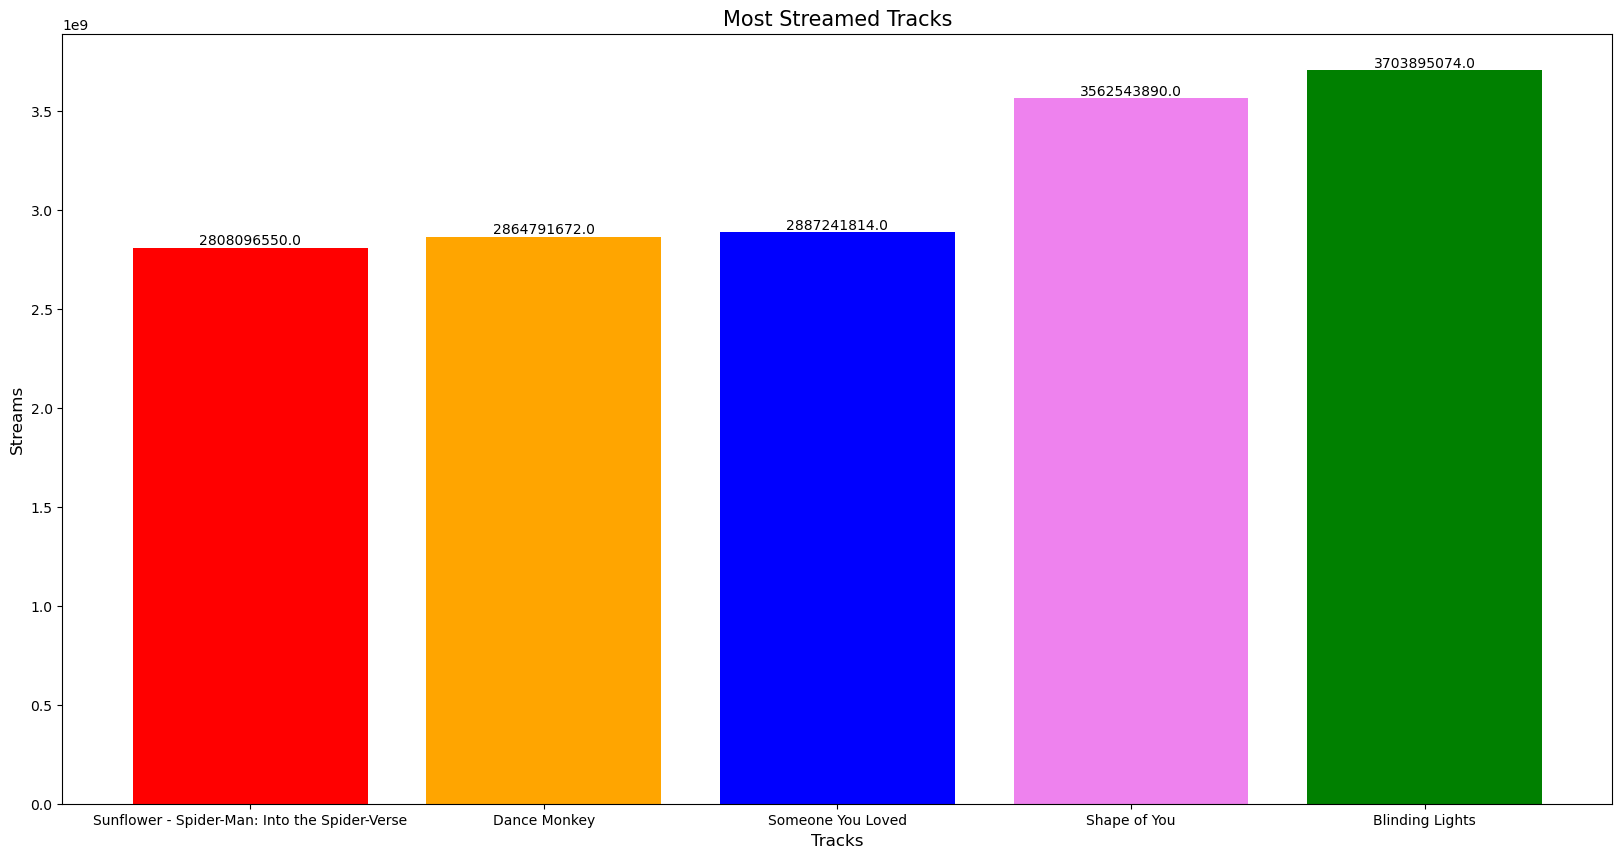

In [65]:
# .sort_values(by = 'column_name'}) sorts the column while maintaining the data frame format.
sorted_streams_raw = raw.sort_values(by = 'streams')

# This part drops rows or entries that do not have a correct value in a specific column, which is a subset of the streams column.
# This is used to filter or clean the streams column to maintain uniformity of data types and eliminate any possible errors that could occur. 
sorted_streams_raw = sorted_streams_raw.dropna(subset = 'streams')

# After cleaning the streams column, we use the tail function to display the top 5 most streamed tracks.
most_streamed = sorted_streams_raw.tail(5)

# I located all the rows since it is already filtered and projected only the track name and the number of streams
most_streamed.loc[ : , ('track_name', 'streams') ]



# Plotting a bar chart of the most streamed tracks

# Setting the figure size to 15x10 for better visibility of the chart
plt.figure(figsize=(20, 10))

# Creating a bar chart of the most streamed tracks
# - The x-axis represents track names from 'most_streamed' DataFrame
# - The y-axis represents the number of streams for each track
# - Bars are colored in red, orange, blue, violet, and green, cycling through these colors for each bar

visual_1 = plt.bar(most_streamed['track_name'], most_streamed['streams'], color=('red', 'orange', 'blue', 'violet', 'green'))

# Labeling or annotation above each graph about the actual number of streams
for bar_v1 in visual_1:
    plt.text( bar_v1.get_x() + (bar_v1.get_width()/2) , bar_v1.get_height(), bar_v1.get_height(), va = 'bottom', ha = 'center' )


# Adding a title and labels for clarity
plt.title('Most Streamed Tracks', fontsize=15)
plt.xlabel('Tracks', fontsize = 12)
plt.ylabel('Streams', fontsize = 12)

# Displaying the chart
plt.show()


#### Most Streamed Tracks
- The most streamed track is Blinding Lights by The Weeknd and followed by Shape of You by Ed Sheeran as shown in the bar graph above. 

## B. Who are the top 5 most frequent artists based on the number of tracks in the dataset?

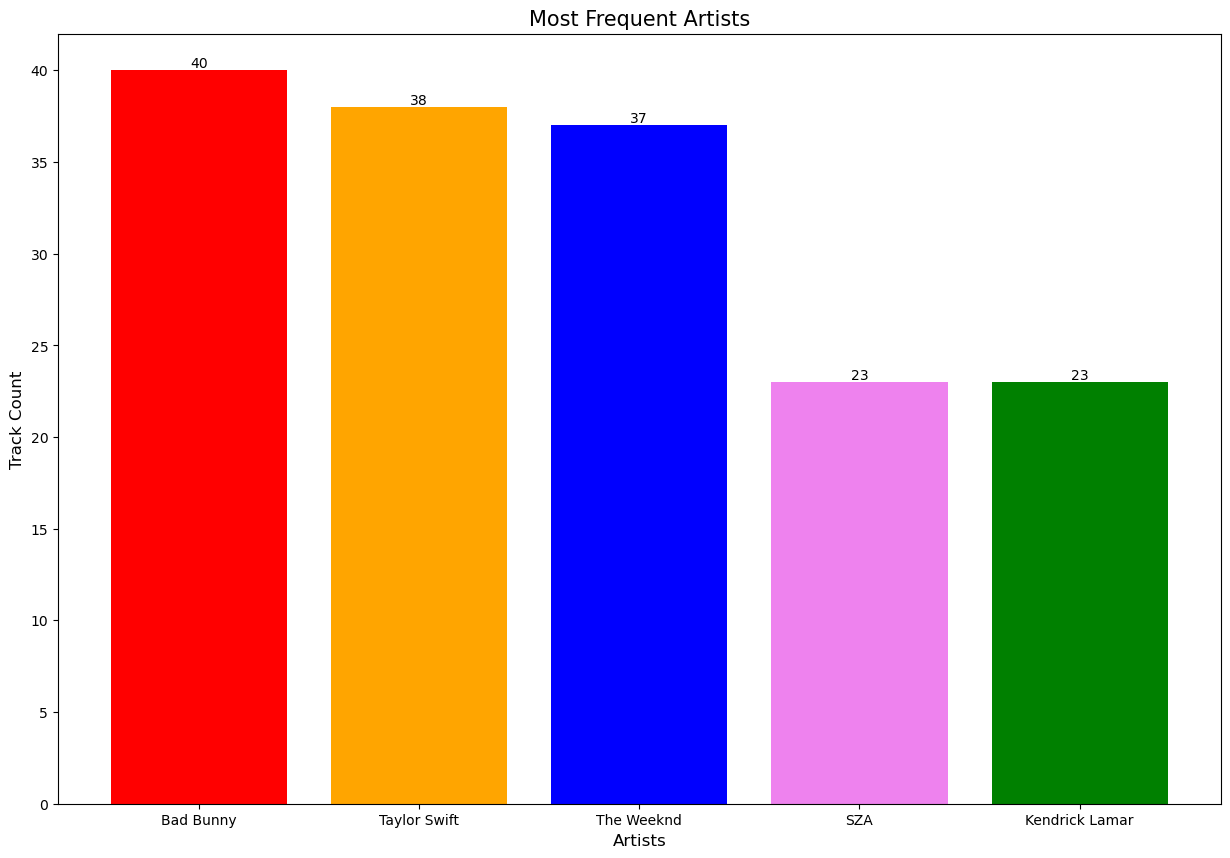

In [69]:
# Counting the frequency of each artist in the 'artist(s)_name' column, even when multiple artists are listed per cell

# Step 1: Split the 'artist(s)_name' column by commas
# - Each cell containing multiple artists (e.g. "Artist1, Artist2") will be split into separate entries in a list
artist_freq = raw['artist(s)_name'].str.split(',')

# Step 2: Expand the lists in each row into separate rows (one artist per row)
# - The .explode() method flattens the lists, so each artist has its own row, allowing for individual counting
artist_freq = artist_freq.explode()

# Step 3: Remove any leading or trailing whitespace from each artist's name
# - This ensures that artist names like "Artist1" and " Artist1" are treated as the same, avoiding duplication issues
artist_freq = artist_freq.str.strip()

# Step 4: Count the occurrences of each unique artist
# - .value_counts() returns a Series with each artist's name as the index and their count as the value
artist_freq = artist_freq.value_counts()




# By using head function, we can harness the top 5 in the leaderboard of frequencies
top_5_artists = artist_freq.head(5)

# Project the results into a DataFrame and reset the index for better presentation
top_5_artists_df = top_5_artists.reset_index()

# Rename columns for clarity
top_5_artists_df.columns = ['Artist' , 'Track Count']  


# Plotting a bar chart of the most frequent artists based on track count

# Setting the figure size to 15x10 for better readability and visual clarity
plt.figure(figsize=(15, 10))

# Creating a bar chart to display the top 5 artists with the highest track count
# - The x-axis represents artist names from the 'top_5_artists_df' DataFrame
# - The y-axis represents the track count for each artist
# - Bars are colored in red, orange, blue, violet, and green, applied cyclically to each bar
visual_2 = plt.bar(top_5_artists_df['Artist'], top_5_artists_df['Track Count'], color=('red', 'orange', 'blue', 'violet', 'green'))


# Labeling or annotation above each graph about the track count of the most frequent artists based on the released tracks
for bar_v2 in visual_2:
    plt.text( bar_v2.get_x() + (bar_v2.get_width()/2) , bar_v2.get_height(), bar_v2.get_height(), va = 'bottom', ha = 'center' )


# Adding a title and axis labels to describe the plot
plt.title('Most Frequent Artists', fontsize=15)
plt.xlabel('Artists', fontsize=12)
plt.ylabel('Track Count', fontsize=12)

# Displaying the final chart
plt.show()


#### Most Frequent Artist Interpretation
- Bad Bunny, followed by Taylor Swift and The Weeknd, are the most frequent artists that released their respective tracks in the given time frame. Based on the data, Bad Bunny is the most active artist releasing their creative tracks. 

# 4. Temporal Trends

## A. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

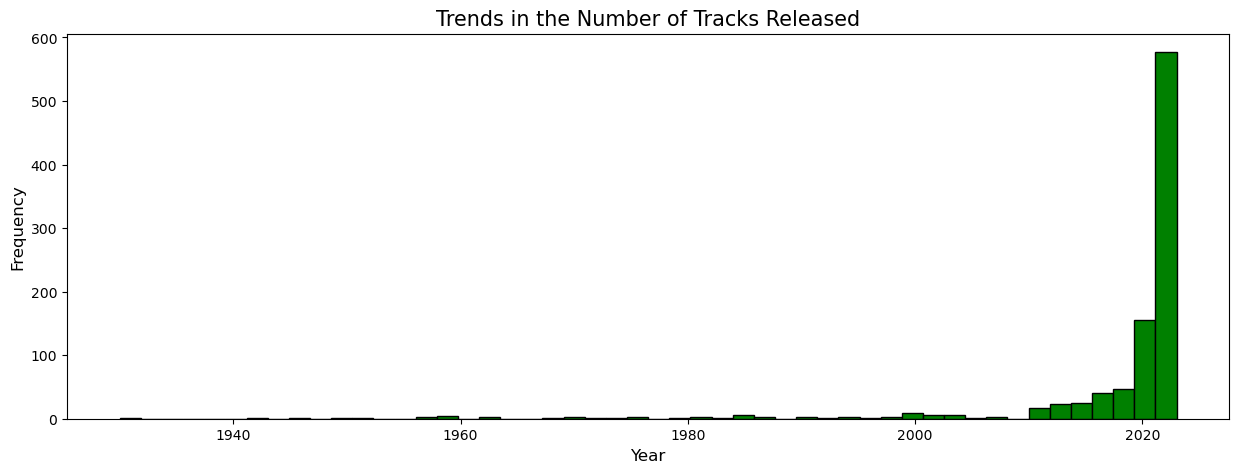

In [74]:
# Sort the year first before plotting for a more organized and sequential representation
released_year_sorted = raw.sort_values( by = 'released_year' )

# Setting the figure size into 15 units (length) by 5 units (height)
plt.figure( figsize = (15,5) )

# In using a histogram, frequency count can be easily visualized 
plt.hist( released_year_sorted['released_year'], bins=50, color='green', edgecolor='black')

# Added title and labels for clarity
plt.title('Trends in the Number of Tracks Released', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

# Plot the histogram for visualization
plt.show()



### Trends in the Number of Tracks Released Interpretation
- As the years pass by, the number of tracks released over time drastically increases in the later 2000s especially in the year 2020 onwards.

## B. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

In [78]:
# I imported a new but the same csv file to retain the numeric released_month column 
raw_2 = pd.read_csv('SpotifyData.csv', encoding = 'ISO-8859-1')

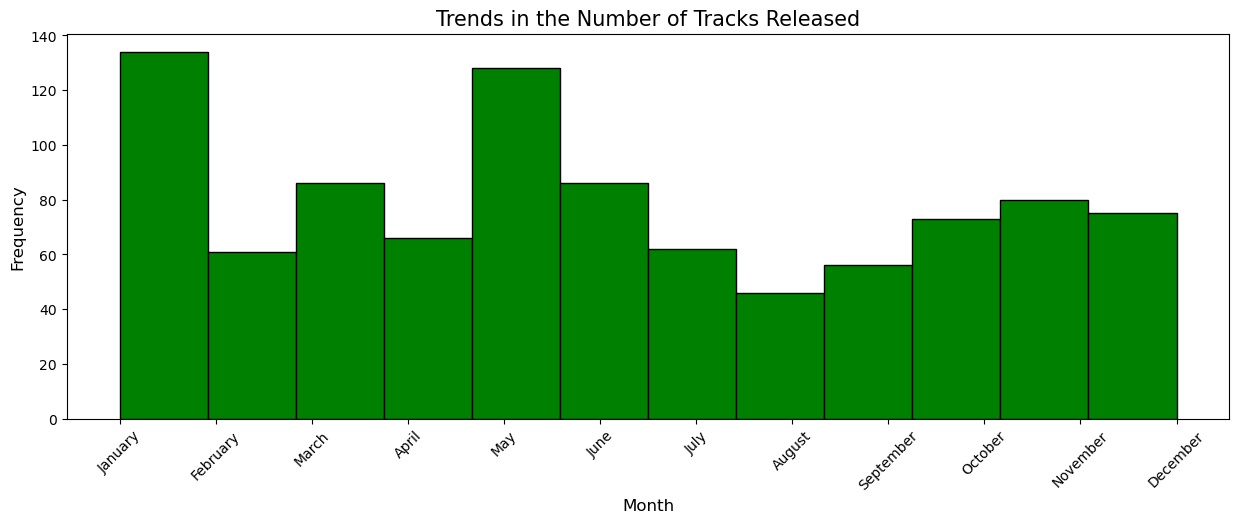

In [80]:
# Sort the DataFrame by the 'released_month' column to organize tracks by their release month
released_month_sorted = raw_2.sort_values(by = 'released_month')

# Create a figure for the histogram with a specified size
plt.figure(figsize=(15, 5))

# Plot a histogram of the 'released_month' data, using 12 bins for the 12 months
# Color the bars green with black edges for better visibility
plt.hist(released_month_sorted['released_month'], bins=12, color='green', edgecolor='black')

# Set the title and labels for the x and y axes
plt.title('Trends in the Number of Tracks Released', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

# Define a list of month names for x-axis tick labels
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Set the x-axis ticks to correspond to month numbers (1-12) and label them with month names
plt.xticks( ticks = range(1, 13), labels = month_label, rotation = 45)

# Display the plot
plt.show()



### Trends in the Number of Tracks Released Interpretation
- As for months, there are minimal to no noticeable trends but it is portrayed that January and May are typically the months where tracks are being released. 

# 5. Genre and Music Characteristics

## A. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

### A.1 Examine the correlation between streams and musical attributes

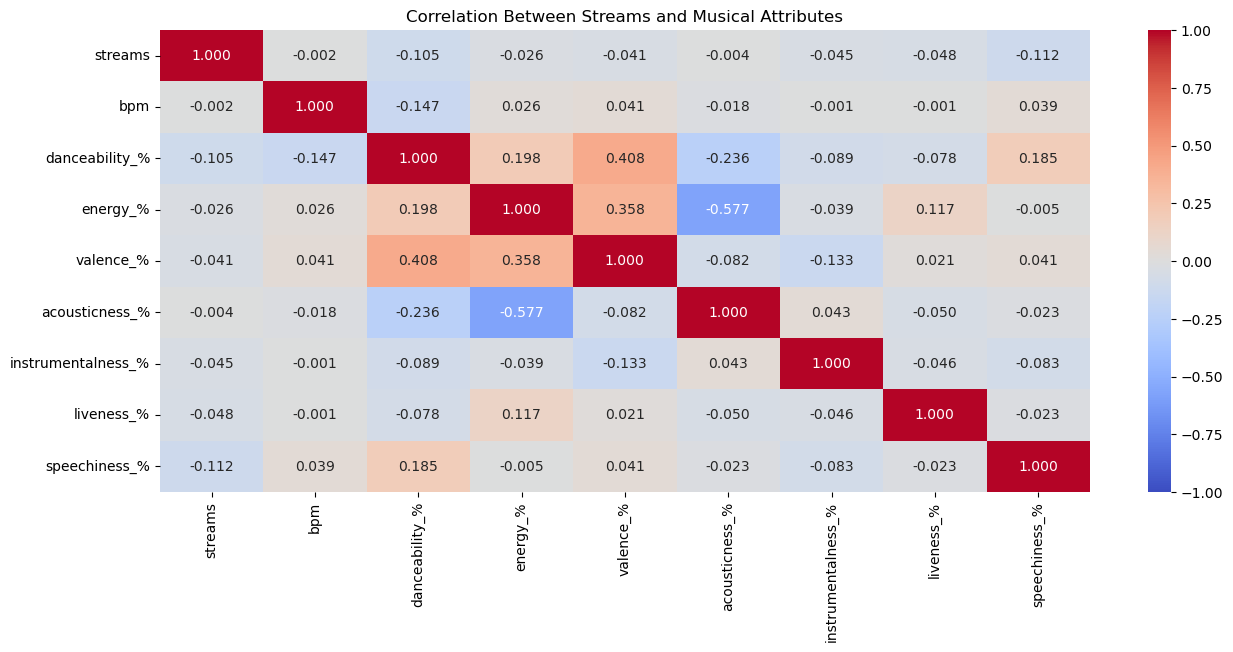

In [86]:
# I will filter only the relevant columns for correlation analysis and store them in a new DataFrame variable.
attributes = raw[ ['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                  'speechiness_%'] ]

# Calculate the correlation matrix to determine their pairwise relationship.
# The .corr() method calculates the pairwise correlation between each pair of variables in 'attributes'.
# This matrix contains values between -1 and 1, where:
#   1 indicates a perfect positive correlation,
#   -1 indicates a perfect negative correlation, and
#   0 indicates no correlation.
correlation_matrix = attributes.corr()

# This part plots a heatmap to visualize the correlations between all variables
plt.figure(figsize=(15, 6))  # Creates a new figure for the heatmap with dimensions 8x6 inches


sns.heatmap(correlation_matrix,     # Data for the heatmap, showing correlations between attributes.
            annot = True,             # This code annotates each cell with the correlation value for easy interpretation.
            cmap = 'coolwarm',        # Sets the color scheme; warm colors for positive correlations, cool colors for negative correlations.
            fmt = ".3f",              # Formats the annotated values to two decimal places.
            vmin = -1, vmax = 1)        # Sets the color range to match the correlation scale (-1 to 1).


plt.title('Correlation Between Streams and Musical Attributes')  # This sets the title of the heatmap.
plt.show()  # Displays the heatmap in the output.

#### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%.
- Based on the correlation indicated on the heatmap, all musical attributes have a weak and negative correlation with the number of streams a specific track has based on the correlation legend on the leftmost part of the chart. However, the speechiness of a song has a relatively strongest opposite correlation, or influence, among all the musical attributes, but considering that it is relative and compared among the other attributes it is still has a weak and opposite relationship with the number of streams. Despite this, the decrease in the speechiness increases the streams of a track and vice versa. 

#### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?
- In terms of the danceability and energy of a specific track, they only have a weak but positive correlation with each other, suggesting that an increase in the danceability increases as well the energy percentage of a track and vice versa. However, this relationship has a minimal or barely observable influence towards each other.

- About the valence and acousticness of a track, they have a weak and opposite correlation with each other. This means they have a minimal to slight direct proportional influence where one variable increases with the other.  

#  6. Platform Popularity

## Data Wrangling Part

In [92]:
# Convert the specified columns to numeric types, coercing any errors to NaN
raw['in_deezer_playlists'] = pd.to_numeric(raw['in_deezer_playlists'], errors = 'coerce')
raw['in_shazam_charts'] = pd.to_numeric(raw['in_shazam_charts'], errors = 'coerce')


## A. How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

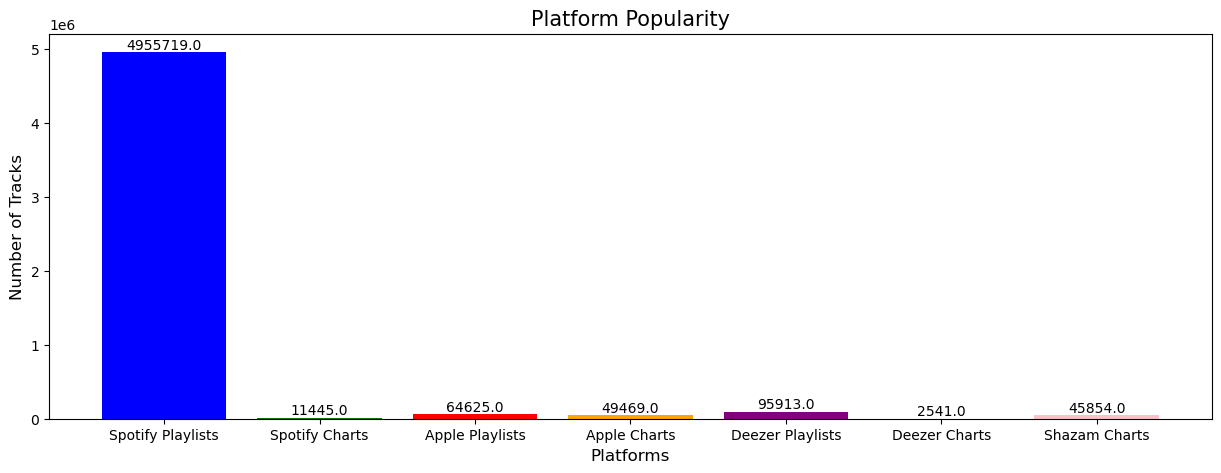

In [95]:
# Calculate the total number of tracks for each platform by summing the values in the specified columns of the 'raw' DataFrame.
platforms = raw[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']].sum()

# Create a bar plot with a figure size of 15 inches by 5 inches for better visibility.
plt.figure(figsize=(15, 5))

# Plot the bar chart using platform names as x-axis labels and their total track counts as y-axis values.
# Assign distinct colors to each bar for clarity.
visual_3 = plt.bar(platforms.index, platforms.values, color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink'])


# Labeling or annotation above each graph about the number of tracks stored in different platforms
for bar_v3 in visual_3:
    plt.text( bar_v3.get_x() + (bar_v3.get_width()/2) , bar_v3.get_height(), bar_v3.get_height(), va = 'bottom', ha = 'center' )


# Set the plot title and axis labels with appropriate font sizes for clarity.
plt.title("Platform Popularity", fontsize=15)
plt.xlabel('Platforms', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Define more descriptive x-axis labels for better understanding.
new_labels = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists', 'Apple Charts', 'Deezer Playlists', 'Deezer Charts', 'Shazam Charts']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

# Display the plot to visualize the data.
plt.show()

### Platform Popularity Interpretation
- According to the graph, the Spotify playlist has the most number of tracks, followed by Deezer Playlists, and Apple Playlists  as the last platform. Based on this analysis, the Spotify playlist platform appears to favor the most popular tracks, boasting 4,955,719 tracks exclusively on this platform. 

#  7. Advanced Analysis

## A. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

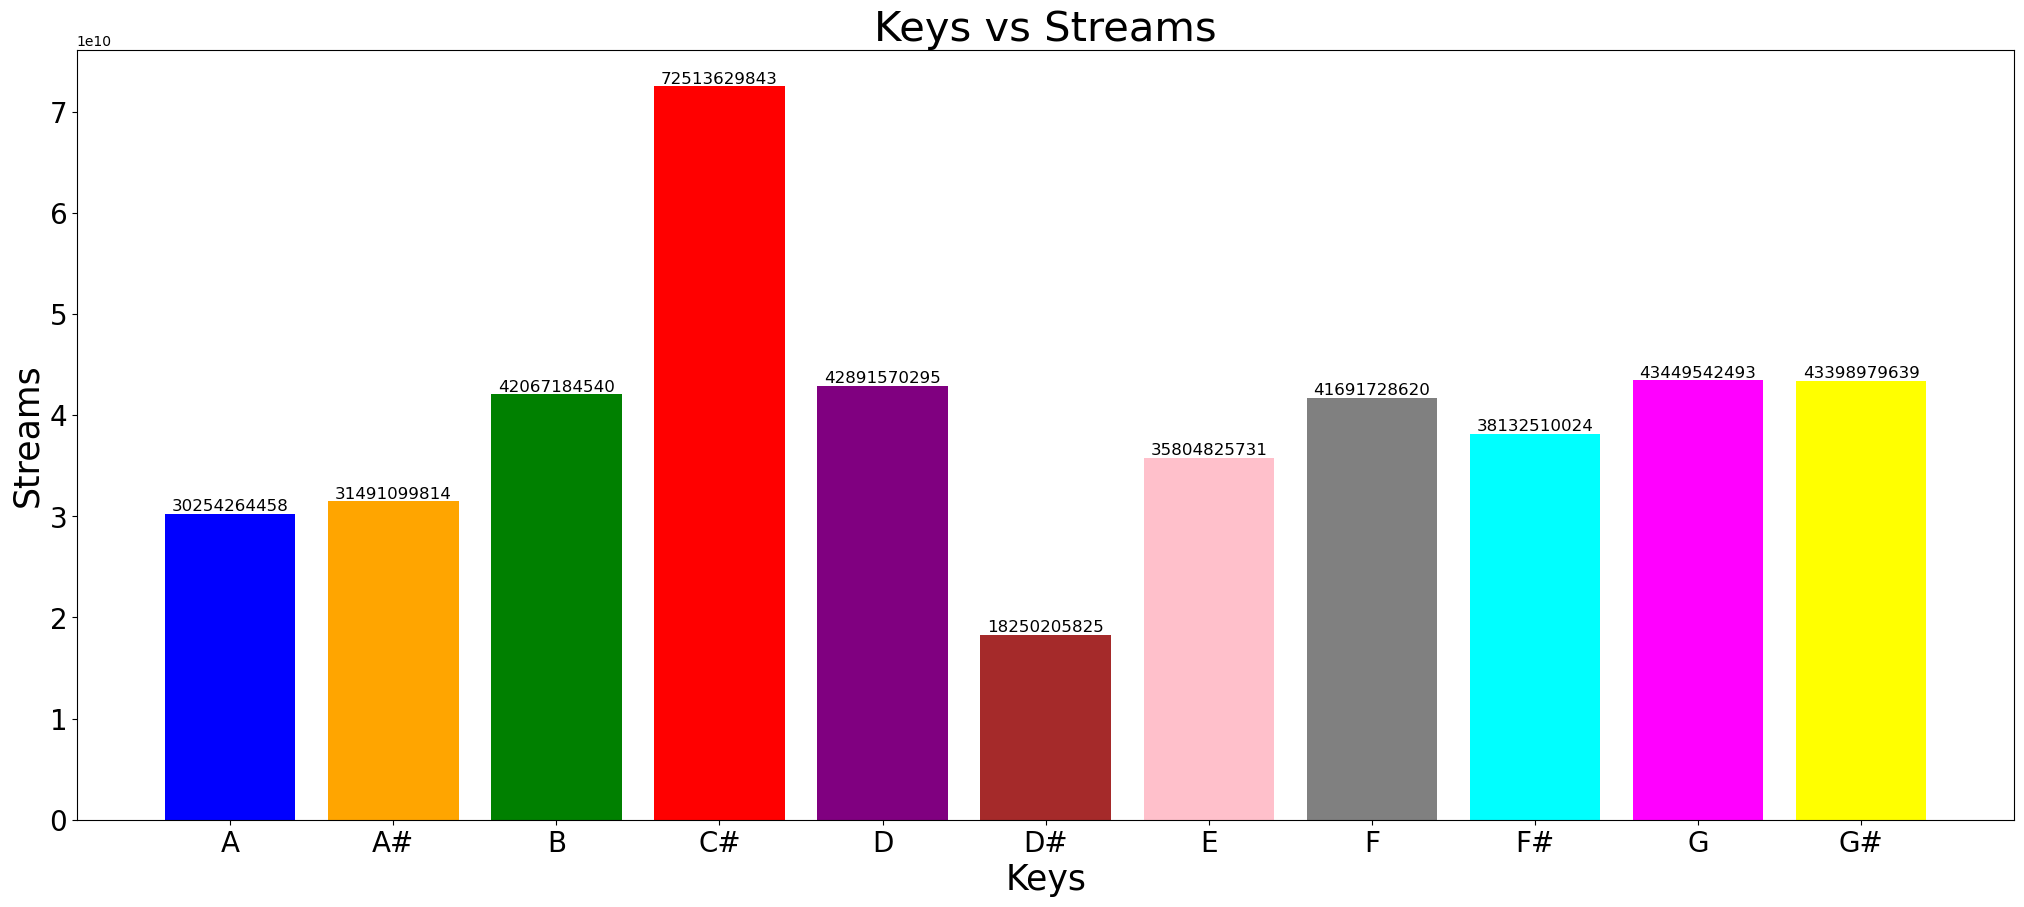

In [100]:
# Group the data by 'key' and sum the streams for each unique key
key_streams = raw.groupby('key')['streams'].sum()

# Create a figure for the bar plot with specified dimensions
plt.figure(figsize=(25, 10))

# Define a color palette for the bars in the plot
colors = [
    'blue',      # Color for the first bar
    'orange',    # Color for the second bar
    'green',     # Color for the third bar
    'red',       # Color for the fourth bar
    'purple',    # Color for the fifth bar
    'brown',     # Color for the sixth bar
    'pink',      # Color for the seventh bar
    'gray',      # Color for the eighth bar
    'cyan',      # Color for the ninth bar
    'magenta',   # Color for the tenth bar
    'yellow'     # Color for the eleventh bar
]

# Create a bar plot using the keys as x-axis and total streams as y-axis
visual_4 = plt.bar(key_streams.index, key_streams.values, color=colors)

# Annotate each bar with the actual value (total streams)
for bar_4 in visual_4:
    yval = bar_4.get_height()  # Get the height of each bar (total streams)
    # Place text annotation above each bar, centered horizontally
    plt.text(bar_4.get_x() + bar_4.get_width() / 2, yval, int(yval), 
             ha='center', va='bottom', fontsize=12, color='black')

# Set the title of the plot with a larger font size
plt.title('Keys vs Streams', fontsize=30)

# Set the label for the x-axis with a larger font size
plt.xlabel('Keys', fontsize=25)

# Set the label for the y-axis with a larger font size
plt.ylabel('Streams', fontsize=25)

# Customize the font size for x-axis tick labels
plt.xticks(fontsize=20)

# Customize the font size for y-axis tick labels
plt.yticks(fontsize=20)

# Display the plot to visualize the data
plt.show()


### Keys vs Streams Interpretation
- Based on the barplot above, people prefer listening and streaming to tracks in C#, G, and G# respectively. Data suggests that most people or most of the sample population like to listen to tracks using these stated keys.

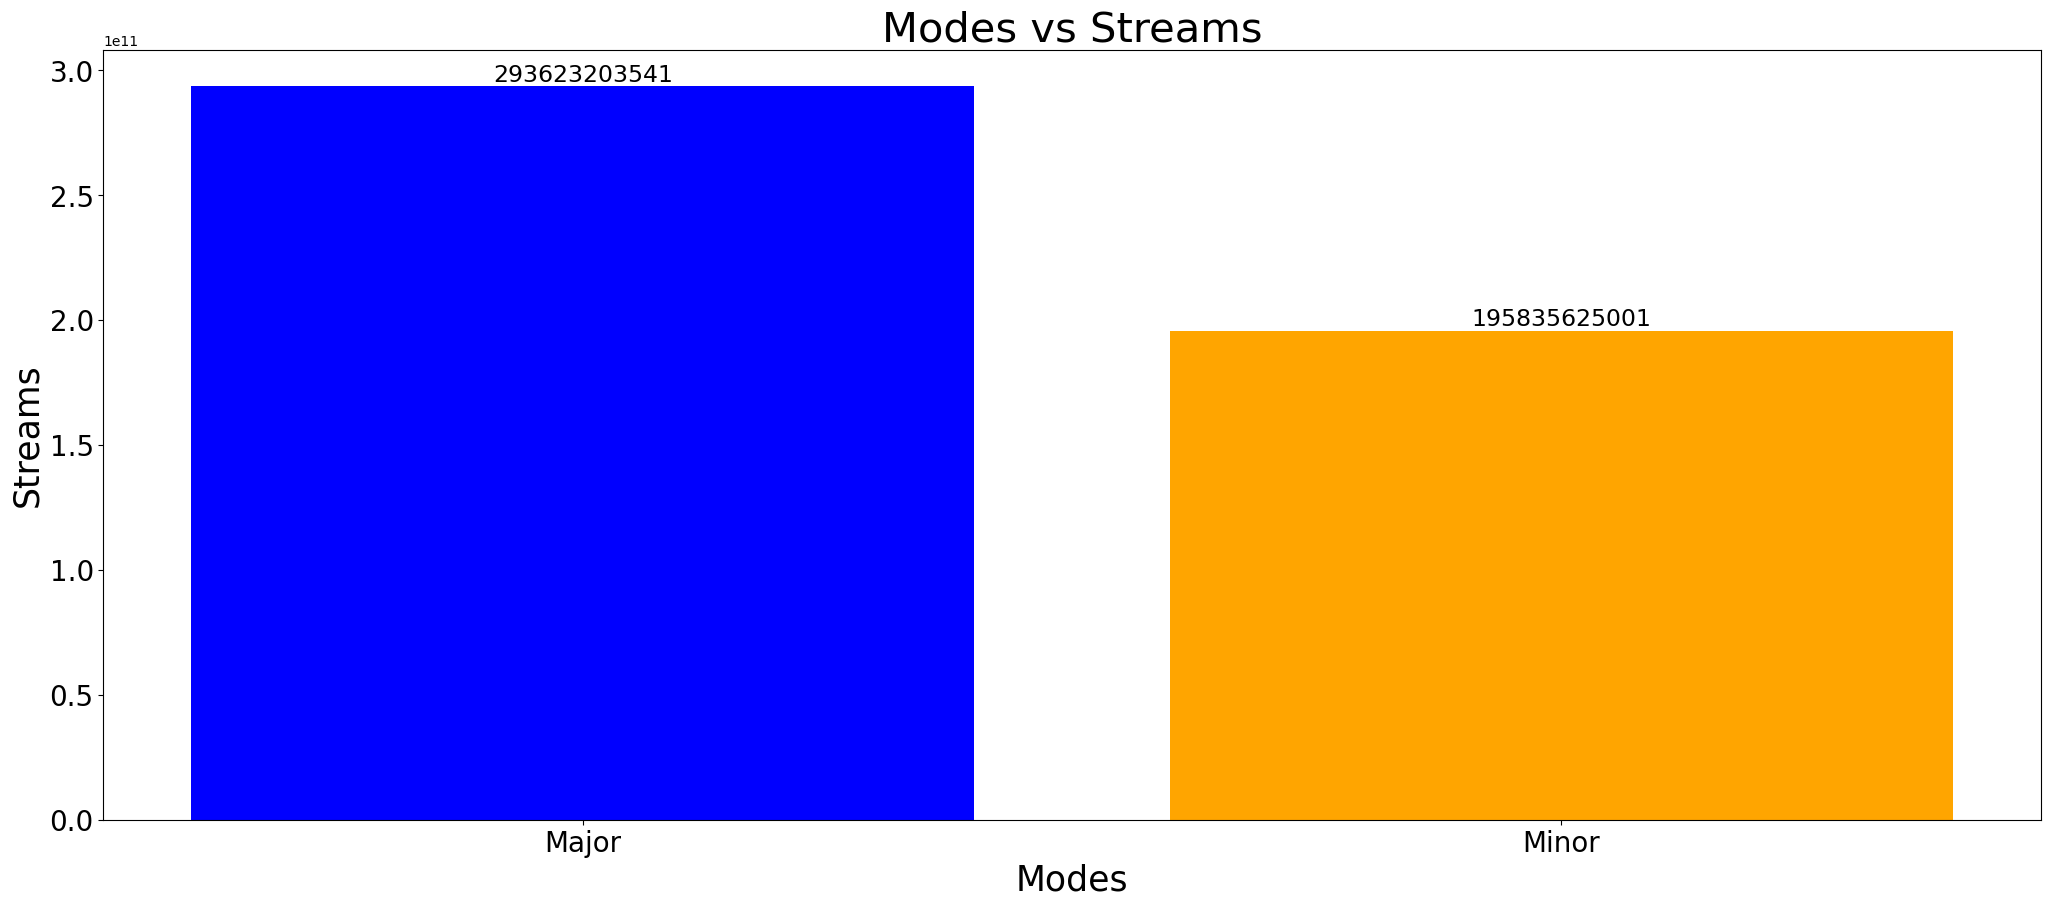

In [103]:
# Group the data by 'mode' and sum the streams for each unique mode
mode_streams = raw.groupby('mode')['streams'].sum()

# Create a figure for the bar plot with specified dimensions
plt.figure(figsize=(25, 10))

# Define a color palette for the bars in the plot
colors = [
    'blue',      # Color for the first mode
    'orange',    # Color for the second mode
]

# Create a bar plot using the modes as x-axis and total streams as y-axis
visuals_5 = plt.bar(mode_streams.index, mode_streams.values, color=colors)

# Annotate each bar with the actual value (total streams)
for bar_5 in visuals_5:
    yval_5 = bar_5.get_height()  # Get the height of each bar (total streams)
    # Place text annotation above each bar, centered horizontally
    plt.text(bar_5.get_x() + bar_5.get_width() / 2, yval_5, int(yval_5), 
             ha='center', va='bottom', fontsize=17, color='black')

# Set the title of the plot with a larger font size
plt.title('Modes vs Streams', fontsize=30)

# Set the label for the x-axis with a larger font size
plt.xlabel('Modes', fontsize=25)

# Set the label for the y-axis with a larger font size
plt.ylabel('Streams', fontsize=25)

# Customize the font size for x-axis tick labels
plt.xticks(fontsize=20)

# Customize the font size for y-axis tick labels
plt.yticks(fontsize=20)

# Display the plot to visualize the data
plt.show()


### Mode vs Streams Interpretation
- The data suggests people favored listening to tracks in Major modes. The streams garnered of tracks in this mode have a bigger gap than the Minor making Major mode more preferred by the listeners.

## B. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

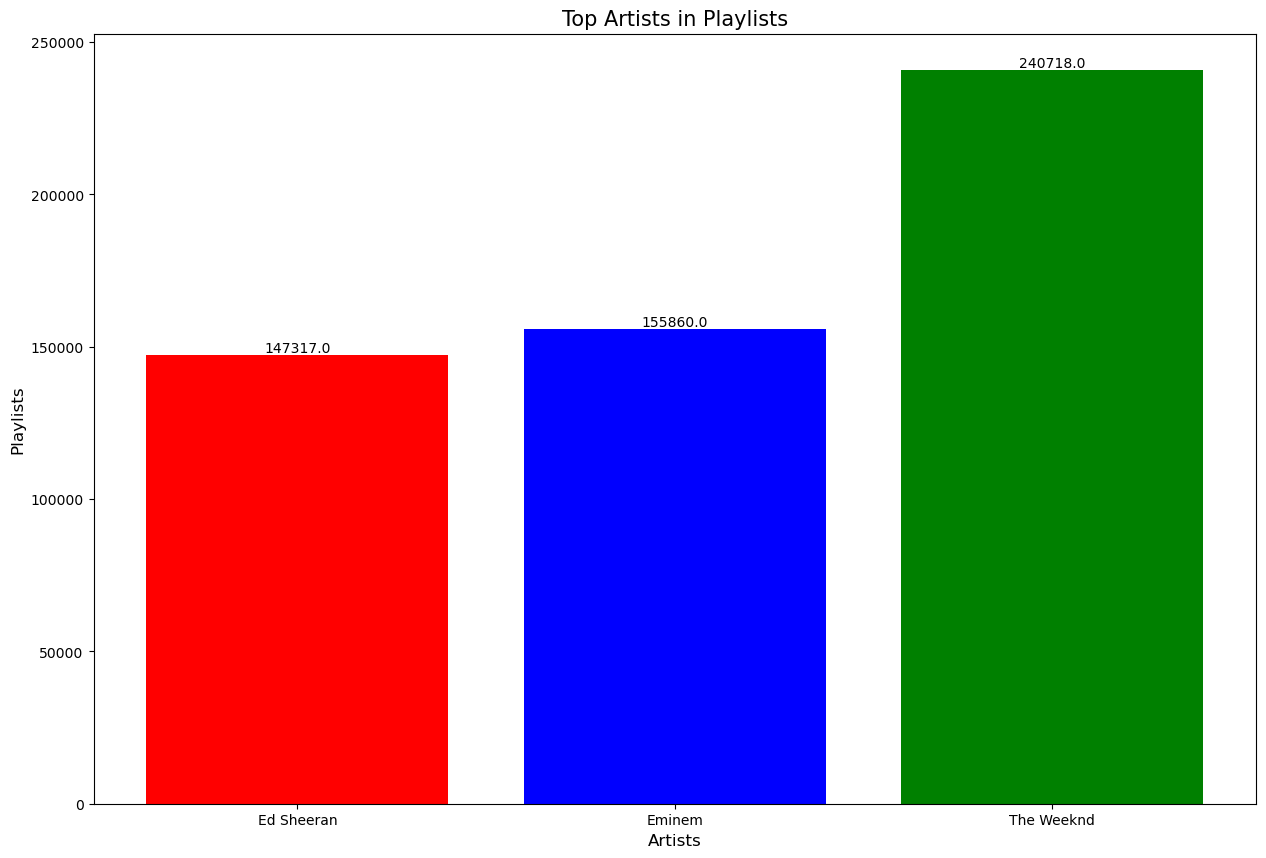

In [107]:
# Split the 'artist(s)_name' column to handle multiple artists in a single cell
# This creates a list of artists for each entry, splitting by ', ' delimiter
raw['artist(s)_name'] = raw['artist(s)_name'].str.split(', ')

# Explode the DataFrame to create a new row for each artist in the list,
# resulting in one row per artist, which simplifies analysis
raw = raw.explode('artist(s)_name')

# Group the data by the 'artist(s)_name' and sum the counts of their appearances
# in the specified playlist columns: 'in_spotify_playlists', 'in_apple_playlists', and 'in_deezer_playlists'
favored_artist_playlists = raw.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().sum(axis=1)

# Sort the total appearances for each artist in ascending order
favored_artist_playlists = favored_artist_playlists.sort_values()

# Select the top 3 artists with the highest total appearances in playlists
top_3_artist_playlist = favored_artist_playlists.tail(3)

# Create a bar plot to visualize the top 3 artists in playlists
plt.figure(figsize=(15, 10))  # Set the figure size for better visibility
visuals_6 = plt.bar(top_3_artist_playlist.index, top_3_artist_playlist.values, color=('red', 'blue', 'green'))  # Create bars with specified colors

# This part annotates each bar graph regarding their precise count or value
for bar_6 in visuals_6:
    plt.text( bar_6.get_x() + (bar_6.get_width()/2) , bar_6.get_height(), bar_6.get_height(), va = 'bottom', ha = 'center' )

# Set the title and labels for the plot to provide context
plt.title('Top Artists in Playlists', fontsize=15)  # Title of the bar chart
plt.xlabel('Artists', fontsize=12)  # Label for the x-axis
plt.ylabel('Playlists', fontsize=12)  # Label for the y-axis

# Display the bar plot
plt.show()


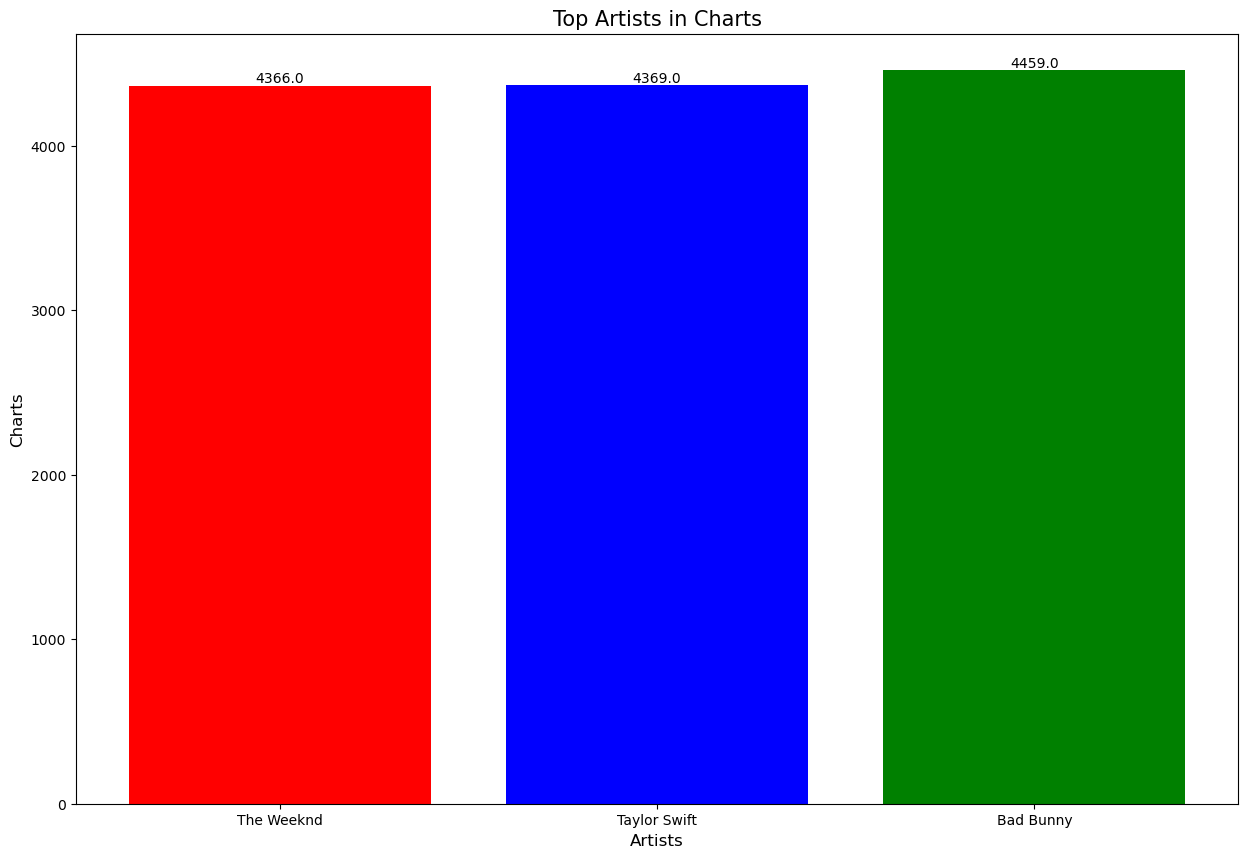

In [109]:
# Group the data by 'artist(s)_name' and sum the counts of their appearances
# in the specified chart columns: 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', and 'in_shazam_charts'
favored_artist_charts = raw.groupby('artist(s)_name')[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].sum().sum(axis=1)

# Sort the total appearances for each artist in ascending order
favored_artist_charts = favored_artist_charts.sort_values()

# Select the top 3 artists with the highest total appearances in charts
top_3_artist_charts = favored_artist_charts.tail(3)

# Create a bar plot to visualize the top 3 artists in charts
plt.figure(figsize=(15, 10))  # Set the figure size for better visibility
visuals_7 = plt.bar(top_3_artist_charts.index, top_3_artist_charts.values, color=('red', 'blue', 'green'))  # Create bars with specified colors

# This part annotates each bar graph regarding their precise count or value
for bar_7 in visuals_7:
    plt.text( bar_7.get_x() + (bar_7.get_width()/2) , bar_7.get_height(), bar_7.get_height(), va = 'bottom', ha = 'center' )


# Set the title and labels for the plot to provide context
plt.title('Top Artists in Charts', fontsize=15)  # Title of the bar chart
plt.xlabel('Artists', fontsize=12)  # Label for the x-axis
plt.ylabel('Charts', fontsize=12)  # Label for the y-axis

# Display the bar plot
plt.show()
